In [61]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


(          1          2          3          4          5          6   \
 x  69.954567  70.344742  70.103401  70.632149  68.519005  68.201302   
 y  71.965759  67.897972  71.229424  69.146477  68.873360  70.515572   
 z  69.411308  70.032524  67.066040  68.764450  69.585922  68.586128   
 
           7          8          9          10  
 x  68.854721  70.275177  70.495232  67.201218  
 y  68.455620  68.976166  75.097015  73.969696  
 z  69.873253  68.269325  73.625114  70.410439  ,
           1          2          3          4          5          6   \
 x  67.812592  69.156723  71.182518  69.343399  69.432266  69.854904   
 y  70.238274  69.900085  70.743622  69.549866  70.437180  68.128838   
 z  68.620720  68.459908  68.535400  69.955124  69.811348  69.110100   
 
           7          8          9          10  
 x  69.921043  70.383026  69.807945  68.383438  
 y  70.406693  68.009186  67.221947  68.491341  
 z  69.329803  66.825394  70.471100  73.134262  )

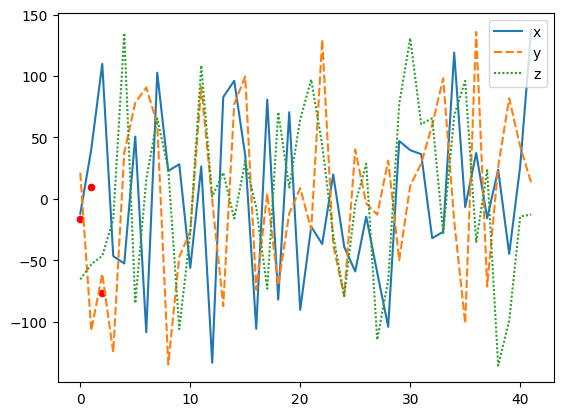

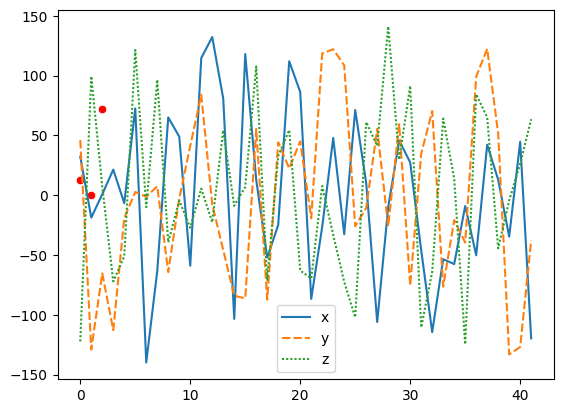

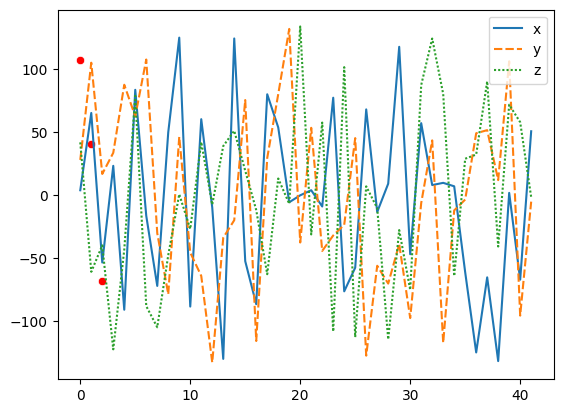

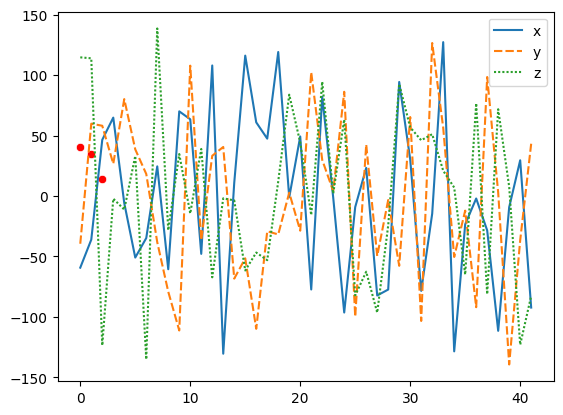

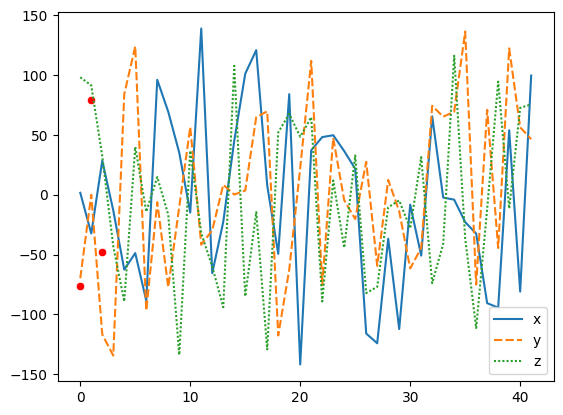

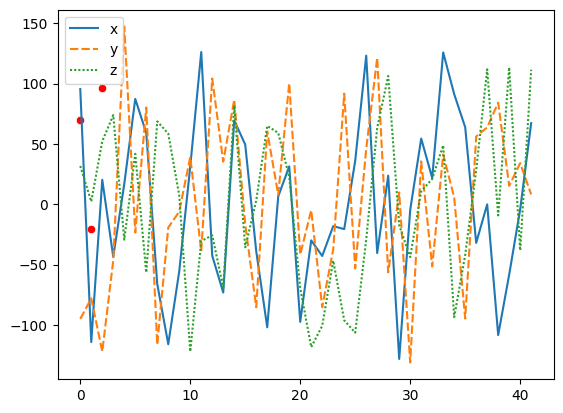

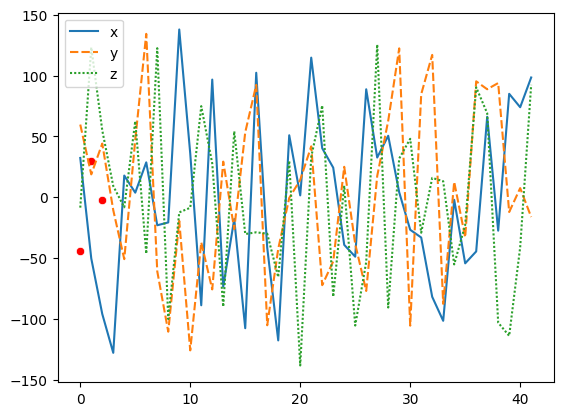

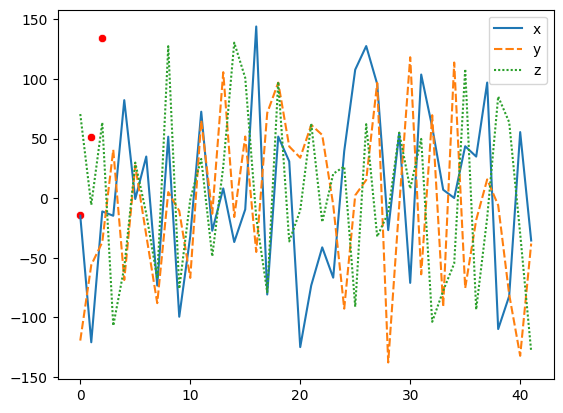

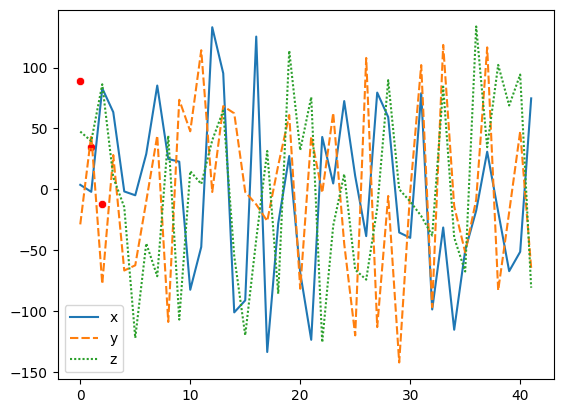

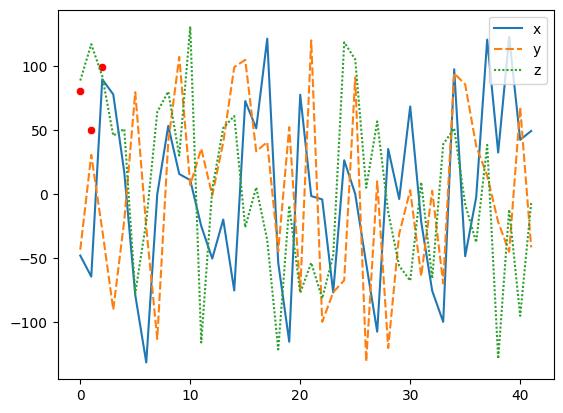

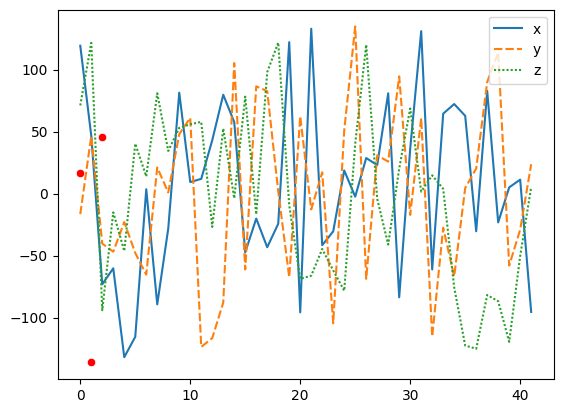

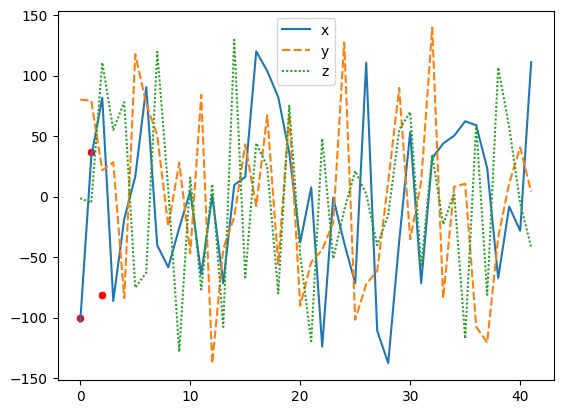

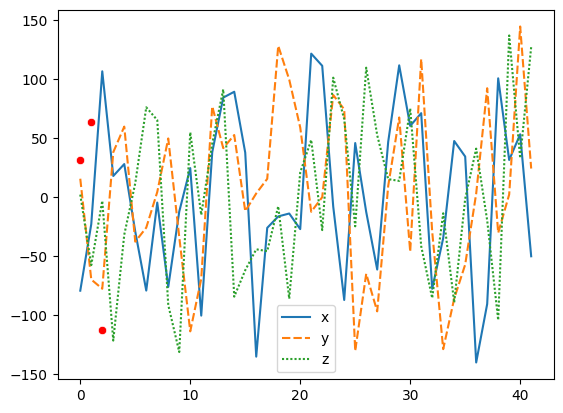

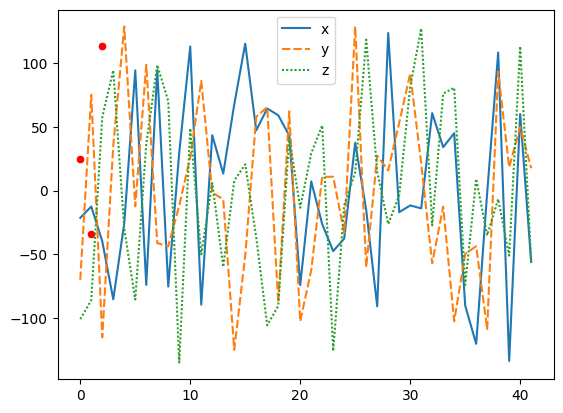

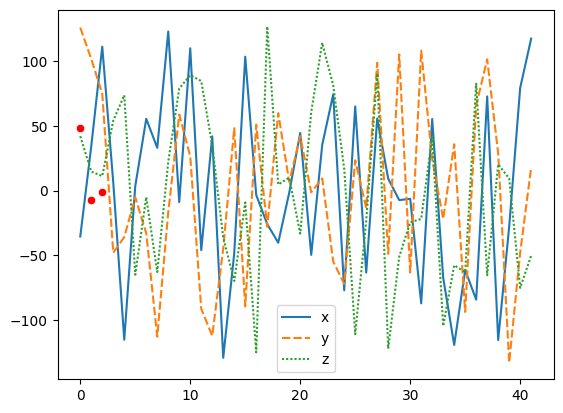

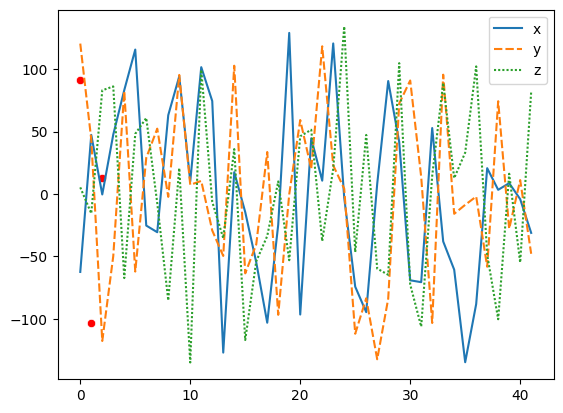

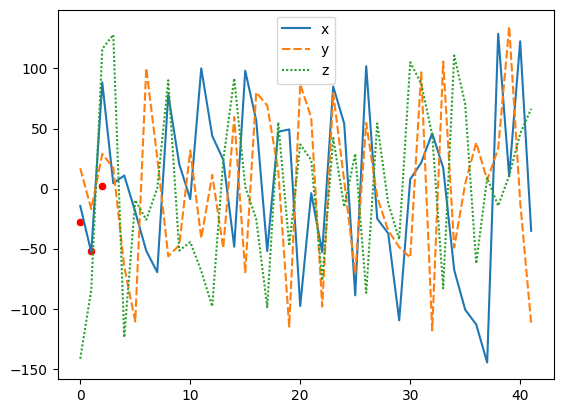

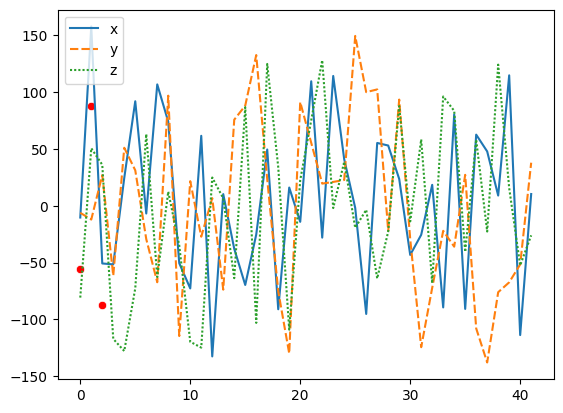

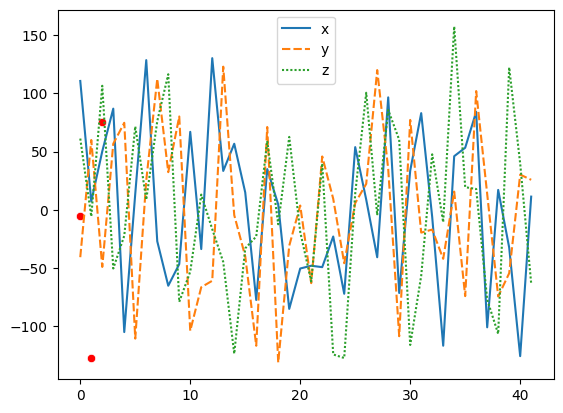

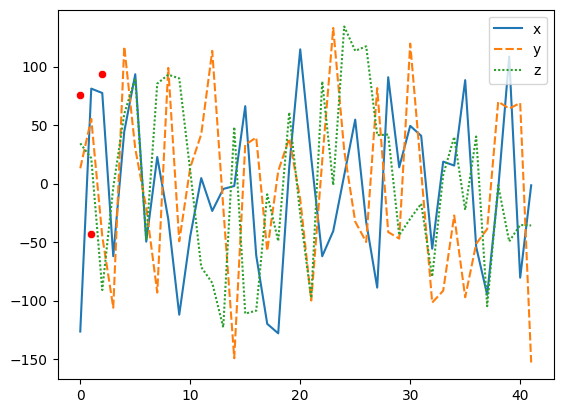

In [145]:
def plot_trial(input):
    df = pd.read_excel(input)
    df = df.drop(['Unnamed: 0', 'Classification Score'], axis = 1)
    trial = df.iloc[0:42]
    target = df.iloc[42:]
    solution_vector =  [0,0,0,5,5,5,5,5,0,0,0,5,5,5]
    target = pd.concat([target, pd.DataFrame(solution_vector)])
    dim_red = TSNE(n_components=3, learning_rate='auto',  init='random', perplexity=40).fit_transform(trial)
    solution_dim =  TSNE(n_components=3, learning_rate='auto',  init='random', perplexity=40).fit_transform(trial)[-1]
    dim_red = dim_red.T
    df_3d = pd.DataFrame()
    df_3d['x'] = dim_red[0]
    df_3d['y'] = dim_red[1]
    df_3d['z'] = dim_red[2]
    #df_3d['norm'] = np.sqrt(np.square(df_3d).sum(axis=1))
    #Calculate std and mean of process
    std = pd.DataFrame(df_3d.std())
    mean = pd.DataFrame(df_3d.mean())
    #Plot
    fig, ax = plt.subplots()
    ax = sns.lineplot((df_3d['x'], df_3d['y'], df_3d['z']))
    sns.scatterplot((solution_dim[0], solution_dim[1], solution_dim[2]), color='r')
    return std, mean
std = pd.DataFrame() 
mean = pd.DataFrame()
for i in os.listdir():
    
    if (("~" not in i) and ("pynb" not in i) and ("git" not in i)):
        std = pd.concat([std,plot_trial(i)[0]], axis = 1)
        mean = pd.concat([mean,plot_trial(i)[0]], axis = 1)
mean.columns = [i for i in range(1,11)]
std.columns = mean.columns
mean, std